In [1]:
import numpy as np
import pandas as pd 
import pickle
from sklearn import preprocessing
from scipy import sparse
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz as grviz
from scipy.sparse import csr_matrix
from scipy.sparse import coo_matrix, hstack

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from xgboost import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.grid_search import GridSearchCV 

import shap

root = 'C:\\Users\\yossi\\jupyter notebook\\XGboost\\xgboostlab\\'
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

pd.set_option('use_inf_as_na', True)

C:\Users\yossi\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
C:\Users\yossi\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\yossi\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


## Read Data - 2012 lamas prat data with 2016 actual values of varaibles to be predicted - futereLFP, future_hour_income and incomeGroupUp 


In [2]:
dflearning = pd.read_csv(root + 'dflearning.csv')
dflearning = dflearning.sample(frac=1)
dflearning = dflearning.replace(np.Inf, np.nan)
# for those who want to use features from household data (you have to left join them to prat data and also for scoring:
dflearningMB = pd.read_csv(root + 'dflearningMB.csv')

C:\Users\yossi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (18,53,144) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\yossi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (64) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dflearning.head(100)

,Unnamed: 0,achacherz,achnbruavodkodem,achnhartzaa,achnmeshekbayit,achnshiurprati,achnsmartafut,avad12hodashim,avadshana,avodaneedar,bateyseferlamad,beayabriut,beayamafria,bituach,brutoazmaishnati,brutoazmaishnatinew,brutosachir,brutosachirnew,bsysh,c_sachlemaase,chipeschodesh,chipesshana,chipesshavua,dat,datateist,datiutloyehudi,datiutyehudi,gil,gilm,hashavani,hatavotlobbruto,havraakalul,hishtatfutkalul,ikaritpachot35,ivritdibur,ivritkria,ivritktiva,k_gova,k_mishkal,k_safaikarit,k_semelmiktzlim,k_semelmiktzlim2,k_sfatem,k_shnataliya,k_shnlimklali,k_sug_mosad,kamaavaddy,kamaavadk,kamaavadn2,kamaavadny,kamaavady,kamanosaf,kamapachot,kita,koshihalicha,koshilehitrachetz,koshilevush,koshimb,koshireia,koshishmia,koshizikaron,kriahanaa,leom,limudim,limudim2,m_eretz,m_eretzav,m_eretzem,maanakkalul,mamadavoda,mamadavoday,maongan,maonganyesodi,maonganyesodi2,matanakalul,matzavbriut,mazav,mekabelsachar,mekabelsachary,mekomotavoda,meunyanlaavod,miktzlim1asakim,miktzlim1madaeihevra,miktzlim2asakim,miktzlim2madaeihevra,mikumavoda,mikumavoday,miluyatzmi,min,mishkalorech,mishkalprat,misparachrai,misparav,misparbenzug,misparem,misparhodashimachacher,misparhodashimbituah,misparhodashimhartzaa,misparhodashimmeshekbayit,misparhodashimshiurprati,misparhodashimsmartafut,misparmeshivp,misparmeshivproxy,misparprat,misramelea,misrameleay,nifkadgalkodem,nifkadgalkodemh,ofen_mehush,oved35,oved35y,paamachronachashavani,pidyonkalul,pitzuyimkalul,proxy,rechevkalul,rmbkt,s_seker,sacshnati_leprat,sacshnati_lepratnew,safanosefetacheret,safanosefetanglit,safanosefetaravit,safanosefetidish,safanosefetivrit,safanosefetloyodea,safanosefetrusit,safanosefetsacheret,safanosefetsfaradit,safanosefetzarfatit,schumachacherz,schumachnhartzaa,schumachnshiurprati,schumbituach,schummeshekbayit,schumsmartafut,semelanaf,semelanafy,semelmishlach,semelmishlachy,shana,shanaazmai,shaotavoday,shaotbdk,sibaikarit12chod,sibalozamin,siduri,tashlumacherkalul,tchunatavodabederechklal,tchunatavodashnatit,tchunatavodashvuit,teudaeretz,teudagvoha,tlush,wave,yachas,yachaskirvakalkali,yamim,yamimy,zminut,id,labour_force_participation,n,bruto,hour_income,haveIncome,gilGroup,nhaveIncome,nGroup,groupRank,incomeGroup,MeanIncomeGroup,futureIncomeGroup,futereLFP,future_hour_income,future_mean_income_group,incomeGroupUp,incomeGroupDown
3655,7241,0.0,0.0,0.0,0.0,0.0,0.0,12.0,NaN,NaN,StudiedonlyinPast,no,NaN,0.0,NaN,0.0,NaN,7500.000000,NaN,50.0,NaN,NaN,NaN,Jewish,NaN,NaN,NaN,33.0,33.0,Never,600.0,0.0,0.0,NaN,VeryGood,VeryGood,VeryGood,169_165,59_55,Hebrew,other,Arts,Hebrew,NaN,16andmore,AcademidColleges,NaN,0.0,12.0,12.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NoDifficulty,NoDifficulty,NoDifficulty,onetofourhours,NaN,StudyinthePast,NaN,Israel,Euorope_America,Africa,0.0,Employed,NaN,NaN,NaN,NaN,no,VeryGood,Married,FromWorkingPlace,NaN,1.0,NaN,NaN,NaN,NaN,NaN,othersettlement,NaN,NaN,Female,NaN,432.467101,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0,2.0,2012.0,NaN,90600.000000,NaN,yes,no,no,no,no,no,0.0,no,no,0.0,0.0,0.0,0.0,0.0,0.0,Education,NaN,AcademicPreffesionals,NaN,NaN,NaN,NaN,40.0,NaN,NaN,2185.0,no,Usuallyworkedfull_time,Worked1_9monthsduringthelast12,FullTimeJob,InIsrael,Firstacademicdegree_BAorsimilardegree_,NotBasedonpayslip,1,Spouse,NaN,5,5,NaN,21850002,True,2,7500.000000,46.875000,True,31-35,5957.0,9310,6900,8,7748,8.0,True,52.777778,8586.0,False,False
4326,12074,0.0,0.0,0.0,0.0,0.0,0.0,12.0,NaN,NaN,StudiedonlyinPast,yes,Disturbing,0.0,NaN,0.0,NaN,12000.000000,NaN,50.0,NaN,NaN,NaN,Jewish,NaN,NaN,NaN,31.0,31.0,Rarely,4000.0,0.0,0.0,NaN,VeryGood,VeryGood,VeryGood,184_180,79_75,Hebrew,business,NaN,Russian,1990_1995,16andmore,Univercities,NaN,0.0,12.0,12.0,NaN,NaN,NaN,NaN,NoDifficulty,NoDifficulty,NoDifficulty,NoDifficulty,NoDifficulty,NoDifficulty,NoDifficulty,tenhoursormore,NaN,StudtytodayincludesVacations,NaN,Euorope_America,NaN,NaN,no,Employed,NaN,NaN,NaN,NaN,0.0,NotsoGood,Nevermarried,FromWorkingPlace,NaN,1.0,NaN,NaN,NaN,NaN,NaN,othersettle

In [4]:
dflearning.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5117 entries, 3655 to 2382
Columns: 178 entries, Unnamed: 0 to incomeGroupDown
dtypes: bool(5), float64(77), int64(8), object(88)
memory usage: 6.8+ MB


## Visual analysis of targets 2012 - 2016

## Mission 1: PREDICT LBOUR FORCE PARTICIPATION - LFP

In [5]:
transition = pd.crosstab(index=dflearning["labour_force_participation"], 
                            columns=dflearning['futereLFP'],
                             margins=True)
transition.style.format("{:,.0f}")

futereLFP,False,True,All
labour_force_participation,,,
False,"1,443",672,"2,115"
True,369,"2,633","3,002"
All,"1,812","3,305","5,117"


In [6]:
transition.div(transition["All"],axis=0).style.format("{:.2%}")

futereLFP,False,True,All
labour_force_participation,,,
False,68.23%,31.77%,100.00%
True,12.29%,87.71%,100.00%
All,35.41%,64.59%,100.00%


## Mission 2: Relative income rank change - Predict decile income group improvment at 2016

In [7]:
transition = pd.crosstab(index=dflearning["incomeGroup"], 
                            columns=dflearning['futureIncomeGroup'],
                             margins=True)

transition.style.format("{:,.0f}")

futureIncomeGroup,4.0,5.0,6.0,7.0,8.0,9.0,10.0,All
incomeGroup,,,,,,,,
4,"1,535",116,108,64,58,49,60,"1,990"
5,141,164,85,54,38,11,8,501
6,86,72,150,95,50,14,5,472
7,58,32,88,152,124,33,8,495
8,47,23,22,89,168,126,29,504
9,42,6,17,32,104,257,106,564
10,63,9,11,8,18,87,395,591
All,"1,972",422,481,494,560,577,611,"5,117"


In [8]:
transition.div(transition["All"],axis=0).style.format("{:.2%}")    

futureIncomeGroup,4.0,5.0,6.0,7.0,8.0,9.0,10.0,All
incomeGroup,,,,,,,,
4,77.14%,5.83%,5.43%,3.22%,2.91%,2.46%,3.02%,100.00%
5,28.14%,32.73%,16.97%,10.78%,7.58%,2.20%,1.60%,100.00%
6,18.22%,15.25%,31.78%,20.13%,10.59%,2.97%,1.06%,100.00%
7,11.72%,6.46%,17.78%,30.71%,25.05%,6.67%,1.62%,100.00%
8,9.33%,4.56%,4.37%,17.66%,33.33%,25.00%,5.75%,100.00%
9,7.45%,1.06%,3.01%,5.67%,18.44%,45.57%,18.79%,100.00%
10,10.66%,1.52%,1.86%,1.35%,3.05%,14.72%,66.84%,100.00%
All,38.54%,8.25%,9.40%,9.65%,10.94%,11.28%,11.94%,100.00%


## Mission 3: Hourly Income - Predicting Hourly Income in 2016 for those who worked

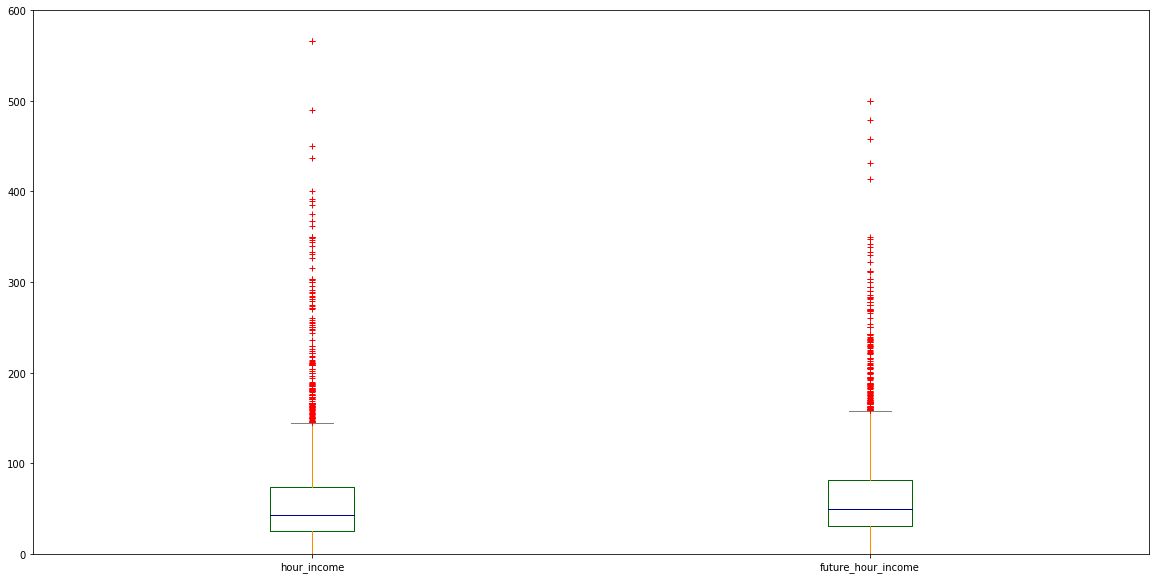

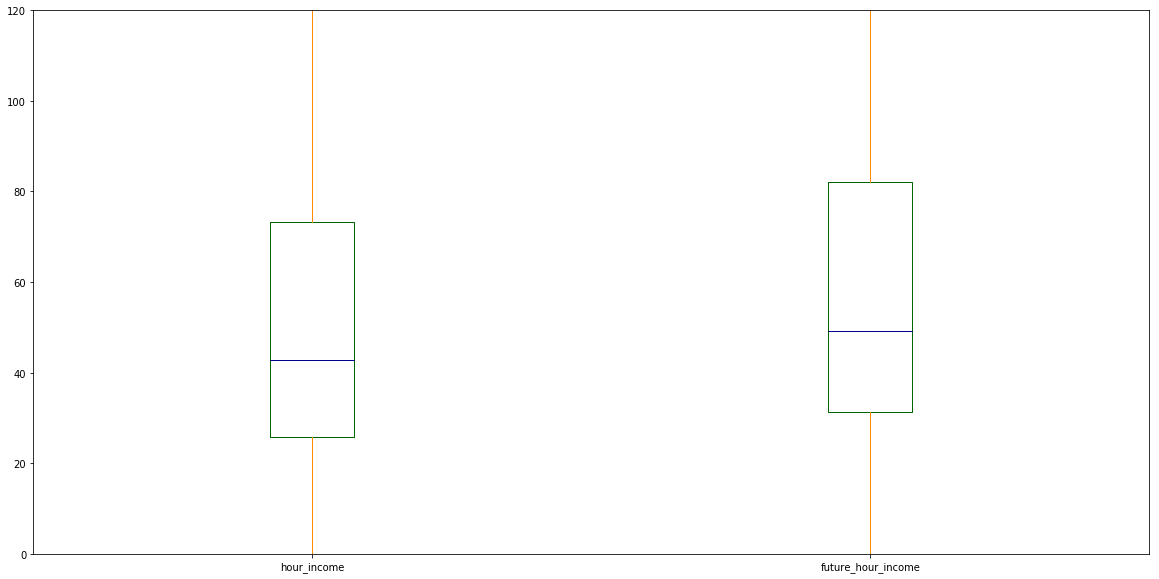

In [9]:
color = dict(boxes='DarkGreen', whiskers='DarkOrange',
            medians='DarkBlue', caps='Gray')

dflearning[['hour_income','future_hour_income']].plot.box(color=color,sym='r+',ylim=(0,600),figsize=(20,10))
dflearning[['hour_income','future_hour_income']].plot.box(color=color,sym='r+',ylim=(0,120),figsize=(20,10))

In [10]:
"incomeGroupChange"
print(dflearning["incomeGroupUp"].mean()) 
print(dflearning["incomeGroupDown"].mean()) 

0.2425249169435216
0.20617549345319522


In [11]:
dflearning["AchAcherZ".lower()].value_counts()

0.0    4894
no      146
yes      76
8.0       1
Name: achacherz, dtype: int64

C:\Users\yossi\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\yossi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:780: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\yossi\Anaconda3\lib\site-packages\numpy\lib\function_base.py:781: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


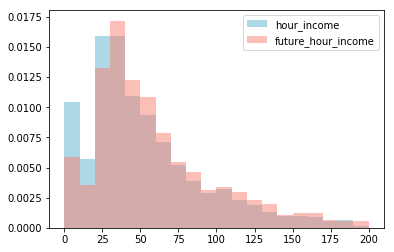

In [12]:
# comparing hour wage between 2012 to 2016
a=plt.hist(dflearning['hour_income'], bins=20, range=[0, 200],label='hour_income', color='lightblue',normed=True)
b=plt.hist(dflearning['future_hour_income'], bins=20, range=[0, 200], alpha=0.5, color='salmon',label='future_hour_income', normed=True)
plt.legend(loc='upper right')

C:\Users\yossi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
C:\Users\yossi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


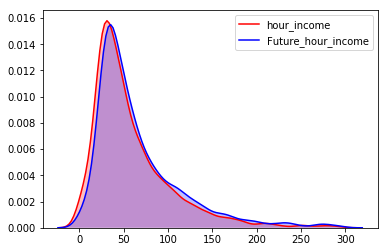

In [13]:
# comparing hour wage between 2012 to 2016 by distributions splines
p1=sns.kdeplot(dflearning['hour_income'],  clip=(0, 300),label='hour_income',shade=True, color="r")
p1=sns.kdeplot(dflearning['future_hour_income'], clip=(0, 300),label='Future_hour_income', shade=True, color="b")

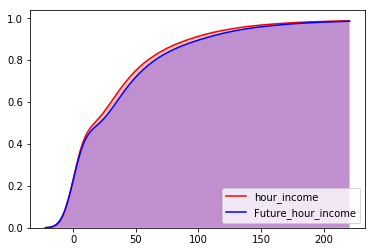

In [14]:
# comparing cumulative hour wage between 2012 to 2016
hour_income = dflearning['hour_income'].fillna(0)
future_hour_income = dflearning['future_hour_income'].fillna(0)
p1=sns.kdeplot(hour_income, cumulative=True, clip=(0, 200),label='hour_income',shade=True, color="r")
p1=sns.kdeplot(future_hour_income , cumulative=True, clip=(0, 200),label='Future_hour_income', shade=True, color="b")

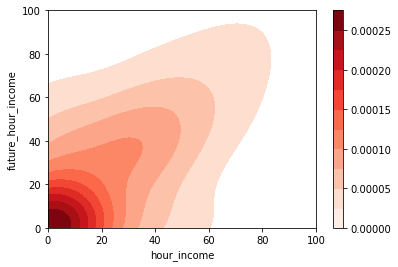

In [15]:
# comparing hour wage between 2012 to 2016 - 3d plot
hour_income = dflearning['hour_income'].fillna(0)
future_hour_income = dflearning['future_hour_income'].fillna(0)
ax = sns.kdeplot(hour_income, future_hour_income,  clip=(0, 100),cmap="Reds", shade=True, shade_lowest=False,bw=15, cbar=True)

## Prepare Data for modeling

In [16]:
drops = ['id','wave','misparprat','siduri','misparmeshivproxy','mishkalprat','mishkalorech',
         'nGroup','n','future_hour_income',
        'incomeGroupUp','incomeGroupDown','s_seker','futereLFP','gilGroup',
         'paamachronachashavani','futureIncomeGroup','gilm','future_mean_income_group']
#
YLFP = dflearning['futereLFP']
YhourIncome = dflearning['future_hour_income']
YincomeUp = dflearning['incomeGroupUp']

data=dflearning.drop(drops,axis=1)
cols = list(data.select_dtypes(include=['object']).columns)
X = pd.get_dummies(data=data, columns=cols,sparse=True)
# X['hour_income'] = X['hour_income'].replace(np.Inf, np.nan)
seed = 30
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, YLFP, test_size=test_size,random_state=seed)

## Modeling

In [18]:
bst = XGBClassifier = ......

## Model Analysis

In [19]:
imp = bst.get_booster().get_fscore()
imp = sorted(imp,key=imp.get,reverse=True)
cols = [*imp]

plt.rcParams['figure.figsize'] = [10, 10]
plot_importance(bst, ax=None, height=0.5, xlim=None, ylim=None,
                title='Feature importance', xlabel='F score', ylabel='Features', 
                importance_type='weight', max_num_features=60 )


## SHAP Analysis of model results

shap.initjs()
shap_values = shap.TreeExplainer(bst).shap_values(X_train)
explainer = shap.TreeExplainer(bst)

shap.force_plot(shap_values[1,:], X_train.iloc[10,:])

shap.force_plot(shap_values[1:20,], X_train.iloc[1:20].fillna(0))

shapv = pd.DataFrame(shap_values)
colum = list(X_train)
colum[len(colum):] = ['bias'] 
shapv.columns = colum
#shapv.head(100)
shap.force_plot(shap_values[0,:], X_train.iloc[10,:])
shap.summary_plot(shap_values, X_train,max_display=40)

for col in cols[0:80] :
    print(col)
    shap.dependence_plot(col, shap_values,X_train,interaction_index='gil', color='coolwarm')
    shap.dependence_plot(col, shap_values,X_train,interaction_index='min_Female')
    shap.dependence_plot(col, shap_values,X_train,interaction_index='k_shnlimklali_13_15')


# Might take a lot of time. Be patient, Its worth it....
shap_interaction_values = shap.TreeExplainer(bst).shap_interaction_values(X_train.iloc[:250,:])

shap.summary_plot(shap_interaction_values, X_train.iloc[:250,:])

tmp = np.abs(shap_interaction_values).sum(0)
for i in range(tmp.shape[0]):
    tmp[i,i] = 0
inds = np.argsort(-tmp.sum(0))[:10]
tmp2 = tmp[inds,:][:,inds]
plt.figure(figsize=(14,14))
plt.imshow(tmp2)
plt.yticks(range(tmp2.shape[0]), X.columns[inds], rotation=50.4, horizontalalignment="right")
plt.xticks(range(tmp2.shape[0]), X.columns[inds], rotation=50.4, horizontalalignment="left")
plt.gca().xaxis.tick_top()

## Scoring

dfscoring = pd.read_csv(root + 'dfscoring.csv')
# for those who used MB files:
dfscoringMB = pd.read_csv(root + 'dfscoringMB.csv')
drops = ['id','wave','misparprat','siduri','misparmeshivproxy','mishkalprat','mishkalorech',
         'nGroup','s_seker','gilGroup',
         'paamachronachashavani','gilm']

data=dfscoring.drop(drops,axis=1)
cols = list(data.select_dtypes(include=['object']).columns)
X_score = pd.get_dummies(data=data, columns=cols,sparse=True)

dfscoring.head(100)

#X_score[......] = X_score[.....].replace(np.Inf, np.nan)
X_train,X_score = X_train.align(X_score, join='left', axis=1, fill_value=0)

pred = bst.predict_proba(X_score)

sum(pred)
#sum(pred[:,0])

XGBoostError: need to call fit or load_model beforehand